In [1]:
# import all necessary package

import os
import random
import skimage.data
import skimage.transform
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [2]:
def load_data(data_dir):
    
    ''' load all training and test data given path'''
    
    directories = [d for d in os.listdir(data_dir) if os.path.isdir(os.path.join(data_dir, d))]
    labels = []
    images = []
    for d in directories:
        label_dir = os.path.join(data_dir, d)
        file_names = [os.path.join(label_dir, f) 
                      for f in os.listdir(label_dir) if f.endswith(".ppm")]
    
        for f in file_names:
            images.append(skimage.data.imread(f))
            labels.append(int(d))
    return images, labels

# create train path 
train_data_dir = os.path.join("./GTSRB/Final_Training/Images")

# create test path 
test_data_dir = os.path.join("./GTSRB/Final_Test/Images")

images, labels = load_data(train_data_dir)

In [3]:
print ("Number of labels(classes): " , len(set(labels)))
print ("Number of images in dataset: ", len(images))

Number of labels(classes):  43
Number of images in dataset:  39209


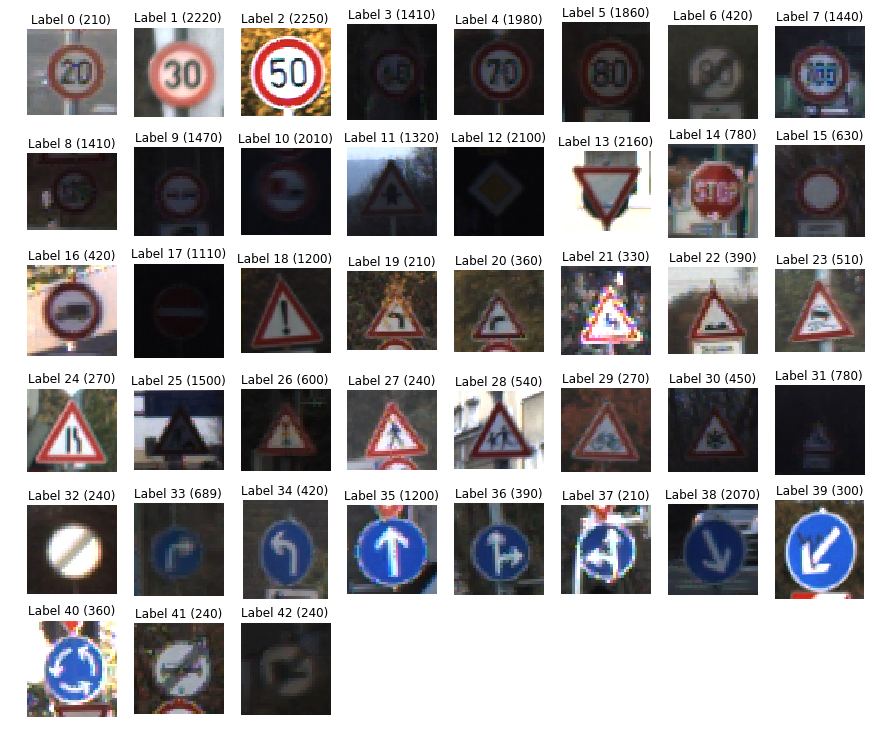

In [4]:
def display_images_and_labels(images, labels):
    
    ''' plot first image of all labels'''
    
    unique_labels = set(labels)
    plt.figure(figsize=(15, 15))
    i = 1
    for label in unique_labels:

        image = images[labels.index(label)]
        plt.subplot(7, 8, i)  #7 rows , 8 columns
        plt.axis('off')
        plt.title("Label {0} ({1})".format(label, labels.count(label)))
        i += 1
        _ = plt.imshow(image)
    plt.show()

# plot first image
display_images_and_labels(images, labels)

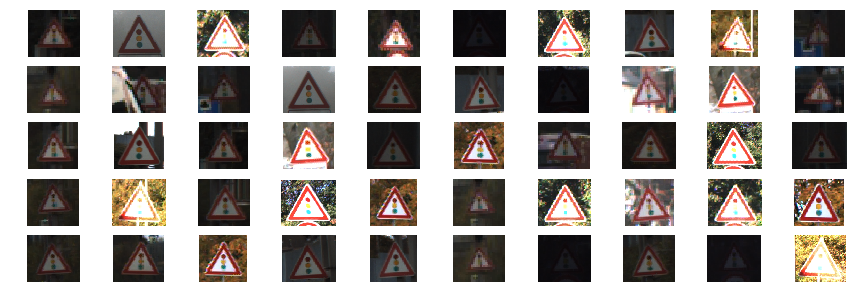

In [5]:
def display_label_images(images, label):
    
    ''' plot first 50 images of given label(class) '''
    
    limit = 50  # 50 images
    plt.figure(figsize=(15, 5))
    i = 1

    start = labels.index(label)
    end = start + labels.count(label)
    for image in images[start:end][:limit]:
        plt.subplot(5, 10, i)  # 5 rows, 10 per row
        plt.axis('off')
        i += 1
        plt.imshow(image)
    plt.show()

# plot label image
display_label_images(images, 26)

In [6]:
def print_image_shape(images,number_of_images=20):
    
    ''' print 0 to number_of_images   '''
    
    for image in images[:number_of_images]:
        print("shape: {0}, min: {1}, max: {2}"
                .format(image.shape, image.min(), image.max()))


# print images shape 
print_image_shape(images,30)

shape: (40, 37, 3), min: 0, max: 255
shape: (35, 35, 3), min: 0, max: 255
shape: (57, 58, 3), min: 0, max: 156
shape: (42, 47, 3), min: 23, max: 226
shape: (73, 71, 3), min: 1, max: 149
shape: (38, 39, 3), min: 7, max: 255
shape: (48, 45, 3), min: 16, max: 255
shape: (35, 35, 3), min: 3, max: 199
shape: (38, 38, 3), min: 21, max: 207
shape: (108, 111, 3), min: 0, max: 255
shape: (52, 49, 3), min: 0, max: 255
shape: (47, 45, 3), min: 14, max: 255
shape: (41, 41, 3), min: 0, max: 255
shape: (55, 55, 3), min: 24, max: 251
shape: (58, 57, 3), min: 22, max: 238
shape: (38, 38, 3), min: 0, max: 255
shape: (47, 49, 3), min: 5, max: 205
shape: (61, 60, 3), min: 0, max: 255
shape: (56, 55, 3), min: 10, max: 215
shape: (38, 38, 3), min: 0, max: 255
shape: (51, 52, 3), min: 2, max: 148
shape: (41, 42, 3), min: 2, max: 142
shape: (64, 68, 3), min: 5, max: 255
shape: (36, 37, 3), min: 0, max: 255
shape: (37, 38, 3), min: 5, max: 212
shape: (43, 43, 3), min: 0, max: 141
shape: (44, 46, 3), min: 0, m

In [7]:
def get_min_image(images):
  
    ''' returns a tupel of minimum image'''
    
    return min(s.shape for s in images)

def get_max_image(images):
  
    ''' returns a tupel of maximum image'''
    
    return max(s.shape for s in images)

print(' min image -> ',get_min_image(images))
print(' max image -> ',get_max_image(images))

 min image ->  (25, 25, 3)
 max image ->  (225, 243, 3)


In [8]:
def resize_images(image_size =(35,35)):
    
    ''' resize all images given image size
        default value -> (35,35)
        you can change also rgb value '''
    
    return [skimage.transform.
            resize(image, image_size)
            for image in images]

#resize all images
new_images = resize_images()

/usr/local/lib/python3.4/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [9]:
# check resized images
print_image_shape(new_images)

shape: (35, 35, 3), min: 0.09812725090035979, max: 1.0
shape: (35, 35, 3), min: 1.7415263131375004e-17, max: 1.0
shape: (35, 35, 3), min: 0.016797118847538987, max: 0.5786714685874351
shape: (35, 35, 3), min: 0.11397198879551819, max: 0.747114845938375
shape: (35, 35, 3), min: 0.007747098839535281, max: 0.5479311724689871
shape: (35, 35, 3), min: 0.05797519007603058, max: 0.9934213685474186
shape: (35, 35, 3), min: 0.06557022809123618, max: 0.990924369747899
shape: (35, 35, 3), min: 0.011764705882354502, max: 0.7803921568627439
shape: (35, 35, 3), min: 0.10358543417366944, max: 0.8107707082833133
shape: (35, 35, 3), min: 0.01665306122448987, max: 1.0
shape: (35, 35, 3), min: 0.05411764705882331, max: 1.0
shape: (35, 35, 3), min: 0.06817126850740286, max: 0.9988475390156063
shape: (35, 35, 3), min: 0.012376150460183971, max: 1.0
shape: (35, 35, 3), min: 0.11228491396558668, max: 0.8052821128451371
shape: (35, 35, 3), min: 0.09301640656262519, max: 0.9146378551420566
shape: (35, 35, 3), 

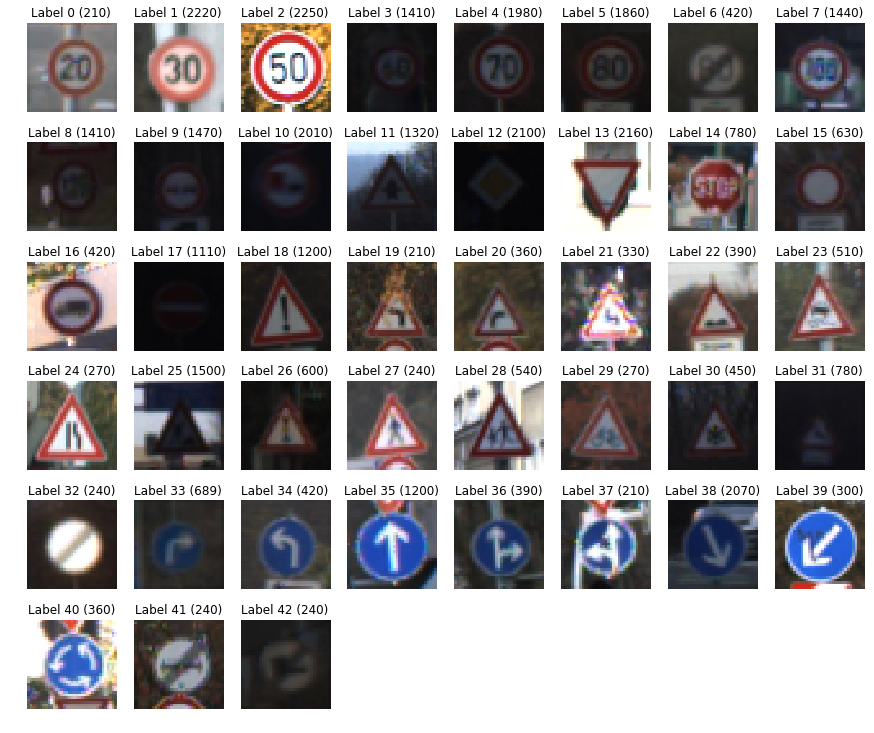

In [10]:
# check resized images  
display_images_and_labels(new_images, labels)